In [1]:
%cat 0Source_Citation.txt

Source and citation

- This notebook is a part of the `pytheos` package.
- Website: http://github.com/SHDShim/pytheos.
- How to cite: S.-H. Shim (2017) Pytheos - a python tool set for equations of state. DOI: 10.5281/zenodo.802392


In [2]:
%matplotlib inline
# %matplotlib notebook # for interactive

For high dpi displays.

In [3]:
%config InlineBackend.figure_format = 'retina'

# 0. General note

- There exist different formulations for the Gruneisen parameter and thermal pressure.  In this notebook we will compare the different formulations for MgO.

# 1. General setup

In [4]:
import uncertainties as uct
import numpy as np
from uncertainties import unumpy as unp
import matplotlib.pyplot as plt
import pytheos as eos

# 2. Calculate Gruneisen parameter

We test three different ways to get Gruneisen parameter at high pressure-temperature.

In [5]:
help(eos.constq_grun)

Help on function constq_grun in module pytheos.eqn_therm_constq:

constq_grun(v, v0, gamma0, q)
    calculate Gruneisen parameter for constant q
    
    :param v: unit-cell volume in A^3
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param q: logarithmic derivative of Grunseinen parameter
    :return: Gruneisen parameter at a given volume



In [6]:
help(eos.speziale_grun)

Help on function speziale_grun in module pytheos.eqn_therm_Speziale:

speziale_grun(v, v0, gamma0, q0, q1)
    calculate Gruneisen parameter for the Speziale equation
    
    :param v: unit-cell volume in A^3
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param q0: logarithmic derivative of Gruneisen parameter
    :param q1: logarithmic derivative of Gruneisen parameter
    :return: Gruneisen parameter



In [7]:
help(eos.altshuler_grun)

Help on function altshuler_grun in module pytheos.eqn_therm_Dorogokupets2007:

altshuler_grun(v, v0, gamma0, gamma_inf, beta)
    calculate Gruneisen parameter for Altshuler equation
    
    :param v: unit-cell volume in A^3
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param gamma_inf: Gruneisen parameter at infinite pressure
    :param beta: volume dependence of Gruneisen parameter
    :return: Gruneisen parameter



We will test for MgO.

In [8]:
v0 = 74.698
v = np.linspace(v0, v0*0.8, 10)

- From Dewaele et al. (2000, JGR):

$$\dfrac{\gamma}{\gamma_0} = \left(\dfrac{V}{V_0}\right)^q$$

where $\gamma_0 = 1.45$ and $q = 0.8 \pm 0.5$.

- From Speziale et al. (2001, JGR):

$$\gamma = \gamma_0 \exp\left\{ \dfrac{q_0}{q_1} \left[ \left(\dfrac{V}{V_0}\right)^{q_1} -1 \right] \right\}$$

where $\gamma_0 = 1.49 \pm 0.03$, $q_0 = 1.65 \pm 0.4$, and $q_1 = 11.8 \pm 0.2$.

- From Dorogokupets and Dewaele (2007, HPR):

$$q = \beta x^\beta \dfrac{\gamma_0 - \gamma_\inf}{\gamma} $$

$$\gamma = \gamma_0 x^\beta$$

where $\gamma_0 = 1.50$, $\gamma_\inf = 0.75$, and $\beta = 2.96$.




In [9]:
gamma_de = eos.constq_grun(v, v0, 1.45, 0.8)
gamma_sp = eos.speziale_grun(v, v0, uct.ufloat(1.49, 0.03), uct.ufloat(1.65, 0.4), uct.ufloat(11.8, 0.2))
gamma_do = eos.altshuler_grun(v, v0, 1.50, 0.75, 2.96) 

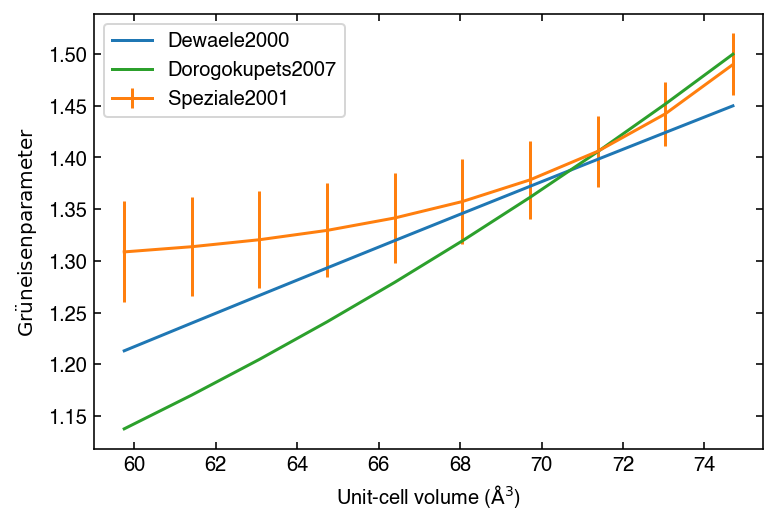

In [10]:
plt.plot(v, gamma_de, label='Dewaele2000')
plt.errorbar(v, unp.nominal_values(gamma_sp), yerr=unp.std_devs(gamma_sp), label='Speziale2001')
plt.plot(v, gamma_do, label='Dorogokupets2007')
plt.xlabel('Unit-cell volume ($\mathrm{\AA}^3$)')
plt.ylabel(r"$\mathrm{Gr{\"u}neisen parameter}$")
plt.legend();

# 3. Calculate Debye temperature

In [11]:
help(eos.constq_debyetemp)

Help on function constq_debyetemp in module pytheos.eqn_therm_constq:

constq_debyetemp(v, v0, gamma0, q, theta0)
    calculate Debye temperature for constant q
    
    :param v: unit-cell volume in A^3
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param q: logarithmic derivative of Gruneisen parameter
    :param theta0: Debye temperature at 1 bar
    :return: Debye temperature in K



In [12]:
help(eos.speziale_debyetemp)

Help on function speziale_debyetemp in module pytheos.eqn_therm_Speziale:

speziale_debyetemp(v, v0, gamma0, q0, q1, theta0)
    calculate Debye temperature for the Speziale equation
    
    :param v: unit-cell volume in A^3
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param q0: logarithmic derivative of Gruneisen parameter
    :param q1: logarithmic derivative of Gruneisen parameter
    :param theta0: Debye temperature at 1 bar in K
    :return: Debye temperature in K



In [13]:
help(eos.altshuler_debyetemp)

Help on function altshuler_debyetemp in module pytheos.eqn_therm_Dorogokupets2007:

altshuler_debyetemp(v, v0, gamma0, gamma_inf, beta, theta0)
    calculate Debye temperature for Altshuler equation
    
    :param v: unit-cell volume in A^3
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param gamma_inf: Gruneisen parameter at infinite pressure
    :param beta: volume dependence of Gruneisen parameter
    :param theta0: Debye temperature at 1 bar in K
    :return: Debye temperature in K



In [14]:
theta_de = eos.constq_debyetemp(v, v0, 1.45, 0.8, 800)
theta_sp = eos.speziale_debyetemp(v, v0, uct.ufloat(1.49, 0.03), uct.ufloat(1.65, 0.4), uct.ufloat(11.8, 0.2), 773)
theta_do = eos.altshuler_debyetemp(v, v0, 1.50, 0.75, 2.96, 760) 

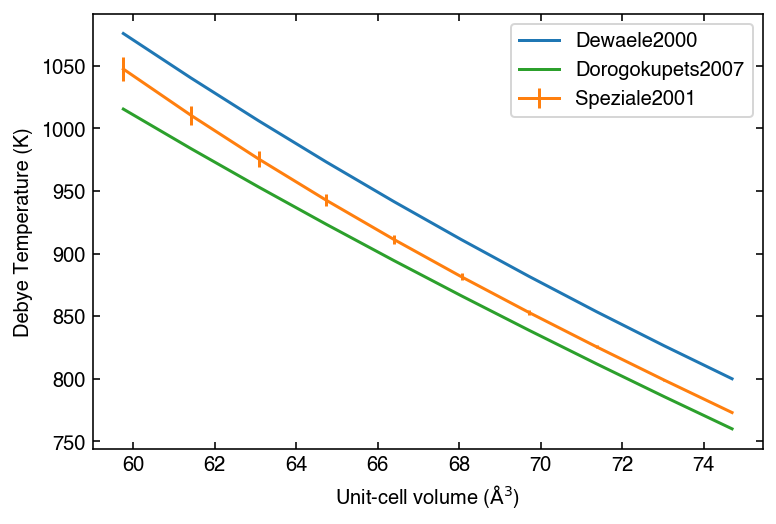

In [15]:
plt.plot(v, theta_de, label='Dewaele2000')
plt.errorbar(v, unp.nominal_values(theta_sp), yerr=unp.std_devs(theta_sp), label='Speziale2001')
plt.plot(v, theta_do, label='Dorogokupets2007')
plt.xlabel('Unit-cell volume ($\mathrm{\AA}^3$)')
plt.ylabel("Debye Temperature (K)")
plt.legend();

# 4. Calculate thermal pressure

In [16]:
help(eos.constq_pth)

Help on function constq_pth in module pytheos.eqn_therm_constq:

constq_pth(v, temp, v0, gamma0, q, theta0, n, z, t_ref=300.0, three_r=24.943379399999998)
    calculate thermal pressure for constant q
    
    :param v: unit-cell volume in A^3
    :param temp: temperature
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param q: logarithmic derivative of Gruneisen parameter
    :param theta0: Debye temperature in K
    :param n: number of atoms in a formula unit
    :param z: number of formula unit in a unit cell
    :param t_ref: reference temperature
    :param three_r: 3R in case adjustment is needed
    :return: thermal pressure in GPa



In [17]:
help(eos.speziale_pth)

Help on function speziale_pth in module pytheos.eqn_therm_Speziale:

speziale_pth(v, temp, v0, gamma0, q0, q1, theta0, n, z, t_ref=300.0, three_r=24.943379399999998)
    calculate thermal pressure for the Speziale equation
    
    :param v: unit-cell volume in A^3
    :param temp: temperature in K
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param q0: logarithmic derivative of Gruneisen parameter
    :param q1: logarithmic derivative of Gruneisen parameter
    :param theta0: Debye temperature at 1 bar in K
    :param n: number of atoms in a formula unit
    :param z: number of formula unit in a unit cell
    :param t_ref: reference temperature
    :param three_r: 3R in case adjustment is needed
    :return: thermal pressure in GPa



In [18]:
help(eos.dorogokupets2007_pth)

Help on function dorogokupets2007_pth in module pytheos.eqn_therm_Dorogokupets2007:

dorogokupets2007_pth(v, temp, v0, gamma0, gamma_inf, beta, theta0, n, z, three_r=24.943379399999998, t_ref=300.0)
    calculate thermal pressure for Dorogokupets 2007 EOS
    
    :param v: unit-cell volume in A^3
    :param temp: temperature in K
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param gamma_inf: Gruneisen parameter at infinite pressure
    :param beta: volume dependence of Gruneisen parameter
    :param theta0: Debye temperature at 1 bar in K
    :param n: number of elements in a chemical formula
    :param z: number of formula unit in a unit cell
    :param three_r: 3 times gas constant.
        Jamieson modified this value to compensate for mismatches
    :param t_ref: reference temperature, 300 K
    :return: thermal pressure in GPa



In [19]:
n = 2; z = 4
temp = np.ones_like(v) * 2000.

In [20]:
pth_de = eos.constq_pth(v, temp, v0, 1.45, 0.8, 800, n, z)
pth_sp = eos.speziale_pth(v, temp, v0, uct.ufloat(1.49, 0.03), uct.ufloat(1.65, 0.4), uct.ufloat(11.8, 0.2), 773, n, z)
pth_do = eos.dorogokupets2007_pth(v, temp, v0, 1.50, 0.75, 2.96, 760, n, z) 

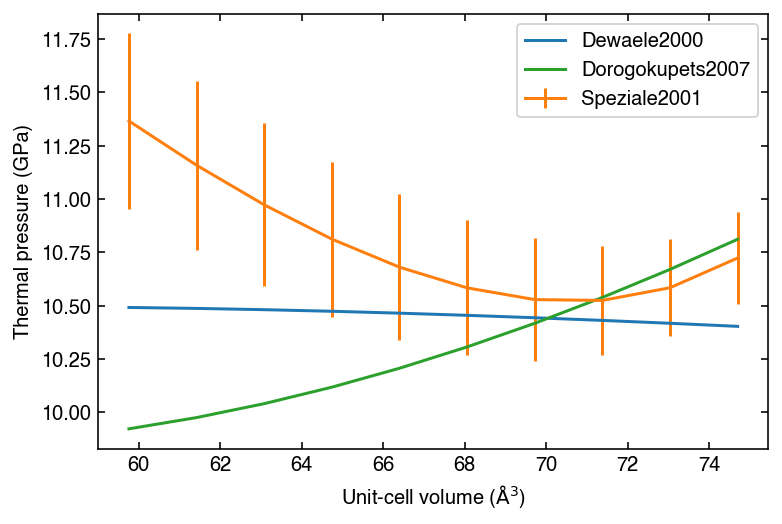

In [21]:
plt.plot(v, pth_de, label='Dewaele2000')
plt.errorbar(v, unp.nominal_values(pth_sp), yerr=unp.std_devs(pth_sp), label='Speziale2001')
plt.plot(v, pth_do, label='Dorogokupets2007')
plt.xlabel('Unit-cell volume ($\mathrm{\AA}^3$)')
plt.ylabel("Thermal pressure (GPa)")
plt.legend();